# Time Series Data


## Download Our Data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-10-08 23:26:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2023-10-08 23:26:13 (4.62 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [2]:
# Importing Data wiht pandas
import pandas as pd

bitcoin_df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")
bitcoin_df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [3]:
# make date is our index columne
bitcoin_df.set_index('Date', inplace=True)

In [4]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


## Visulaizing only what we want

In [6]:
bitcoin_prices = pd.DataFrame(bitcoin_df['Closing Price (USD)'])
bitcoin_prices

,Closing Price (USD)
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


<Axes: xlabel='Date'>

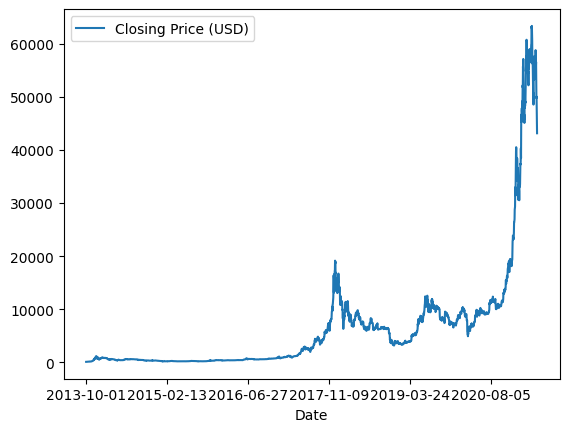

In [7]:
# Plot our data
bitcoin_prices.plot()

# Create our data `train & test`

In [8]:
# get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Closing Price (USD)'].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
        '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
        '2013-10-09', '2013-10-10'], dtype=object),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

### `Rigth way with train & test`


In [9]:
# create train and test
split_size = int(len(prices) * 0.8)

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

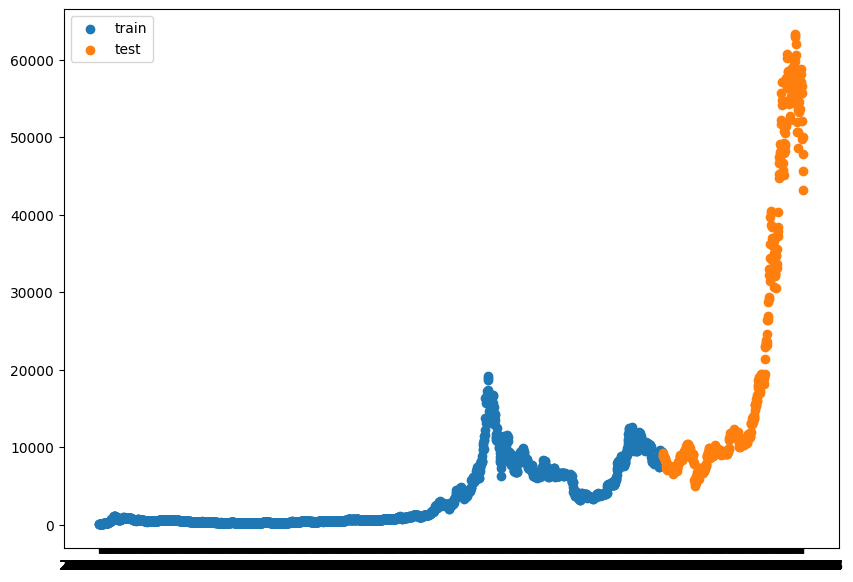

In [10]:
# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()

## Make plotting function

In [11]:
import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Function that plot time series data
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize=14) # make label bigger

  plt.grid(True)

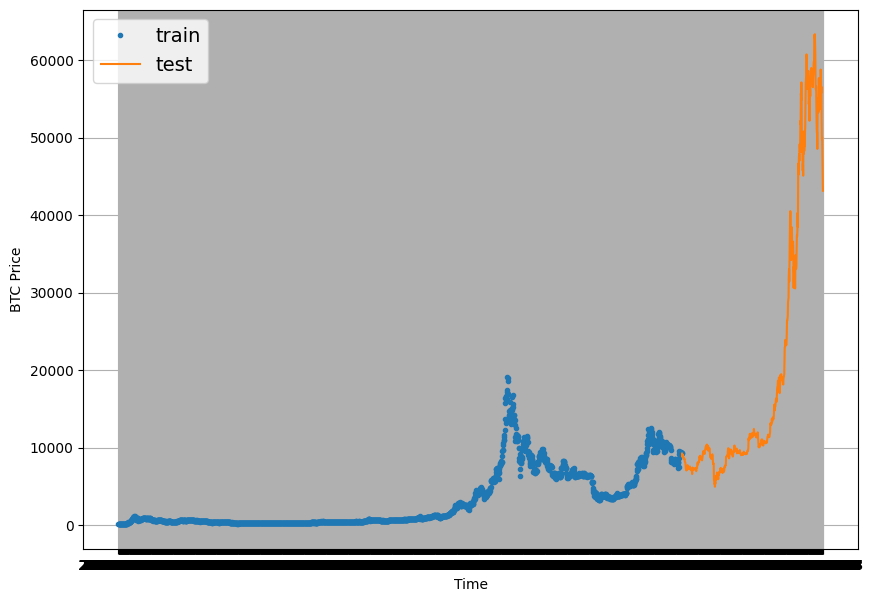

In [12]:
# Test our function
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label='train')
plot_time_series(X_test, y_test, label='test', format="-")

## Model_0 makeing and visualizing model `naive_forecast`

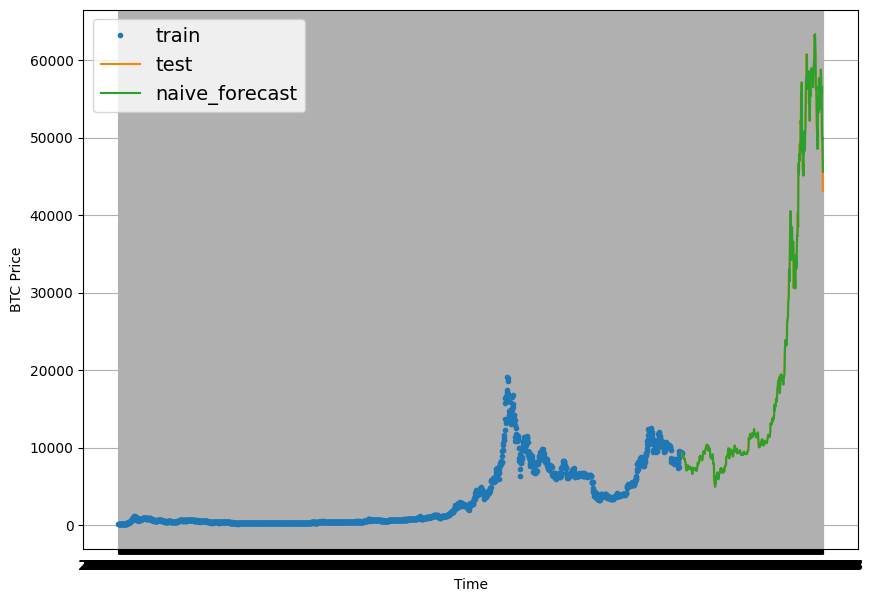

In [13]:
naive_forecast = y_test[:-1]

# plot our naive_forecast
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label='train')
plot_time_series(X_test, y_test, label='test', format="-")
plot_time_series(X_test[1:], naive_forecast, label='naive_forecast', format="-")

## Make our Evaluation metrics

In [14]:
import tensorflow as tf

# MASE implemented courtesy of sktime
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season


In [15]:
# Test function
mean_absolute_scaled_error(y_true = y_test[1:],
                           y_pred = naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

## Make function to evaluate our models forecasting with varoius metrics

In [16]:
from tensorflow.keras.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def evaluate_preds(y_true, y_pred):

  # Make sure float 32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # calc varoius methods
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}


In [17]:
# get naive results
naive_res = evaluate_preds(y_true=y_test[1:],
                           y_pred=naive_forecast)
naive_res

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Formating our Data


In [18]:
# global Variables
HORIZON = 1
WINDOW_SIZE = 7

In [19]:
# Function to Get labelled values
def labelled_window(x, horizon=HORIZON):
  """
  Create labels for windowed
  """

  return x[:, :-horizon], x[:,-horizon:]

In [20]:
# Test Our Function
windows, labels = labelled_window(tf.expand_dims(tf.range(8), axis=0))
windows, labels

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

## Create Function that Preprocessing to turn time series data into windows & labels

In [21]:
import numpy as np

# create function
def make_windows(x=prices, windows_size=WINDOW_SIZE, horizon=HORIZON):

  # 1. Create window of specific window size
  window_step = np.expand_dims(np.arange(windows_size + horizon), axis=0)

  # 2. Create 2D array with multiple window step
  window_indexed = window_step + np.expand_dims(np.arange(len(x) - (windows_size + horizon - 1)), axis=0).T

  # 3. Index on target array only (get prices from window_indexed)
  windowed_arr = x[window_indexed]

  # 4. get labelled from windowed arr
  windows, labels = labelled_window(windowed_arr, horizon=HORIZON)

  return windows, labels

In [22]:
# show 1.
a = np.expand_dims(np.arange(8), axis=0)
a

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [23]:
# show 2.
b = a + np.expand_dims(np.arange(len(prices) - (8 - 1)), axis=0).T
b, b.shape

(array([[   0,    1,    2, ...,    5,    6,    7],
        [   1,    2,    3, ...,    6,    7,    8],
        [   2,    3,    4, ...,    7,    8,    9],
        ...,
        [2777, 2778, 2779, ..., 2782, 2783, 2784],
        [2778, 2779, 2780, ..., 2783, 2784, 2785],
        [2779, 2780, 2781, ..., 2784, 2785, 2786]]),
 (2780, 8))

In [24]:
# show 3.
c = prices[b]
c, c.shape

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           121.795     ,   123.033     ,   124.049     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           123.033     ,   124.049     ,   125.96116   ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         50032.69313676, 47885.62525472, 45604.61575361],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         47885.62525472, 45604.61575361, 43144.47129086]]),
 (2780, 8))

In [25]:
# Test Our function
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [26]:
full_windows[:3], full_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116]]))

## Create Function for `train & test split`

In [27]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [28]:
# test our function
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## Create ModelCheck_Point callback

In [29]:
import os

def create_model_checkpoint(model_name, save_path='model_experiments'):

  # make callback
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Create model_1 Building, compling, fitting

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 3s 43ms/step - loss: 2591.2039 - mae: 2591.2039 - val_loss: 4510.1226 - val_mae: 4510.1226
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 425.0247 - mae: 425.0247 - val_loss: 1269.7507 - val_mae: 1269.7507
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 259.8180 - mae: 259.8180 - val_loss: 1309.1315 - val_mae: 1309.1315
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 230.5027 - mae: 230.5027 - val_loss: 1220.2709 - val_mae: 1220.2709
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 216.3212 - mae: 216.3212 - val_loss: 1187.6748 - val_mae: 1187.6748
Epoch 6/100
18/18 [==============================] - 1s 41ms/step - loss: 213.7755 - mae: 213.7755 - val_loss: 1181.9757 - val_mae: 1181.9757
Epoch 7/100
18/18 [==============================] - 1s 37ms/step - loss: 207.4887 - mae: 207.4887 - val_loss: 1114.9955 - val_mae: 1114.9955
Epoch

In [31]:
# evaluation model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 695.0363 - mae: 695.0363


[695.0362548828125, 695.0362548828125]

### Get best model performance

In [32]:
# get best model
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1_dense')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 565.0411 - mae: 565.0411


[565.0410766601562, 565.0410766601562]

## Create Function for preds

In [33]:
def make_preds(model, data):
  return tf.squeeze(model.predict(data))

In [34]:
# make predictions for model_1
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.717, 8773.221, 9014.426, 8805.28 , 8749.215, 8714.331,
       8671.252, 8560.129, 8432.493, 8527.142], dtype=float32)>

In [35]:
# evaluate model
model_1_res = evaluate_preds(y_true=tf.squeeze(test_labels), # make squuze to make 2 like each other
                             y_pred=model_1_preds)
model_1_res

{'mae': 565.04114,
 'mse': 1164058.1,
 'rmse': 1078.9153,
 'mape': 2.554576,
 'mase': 0.99262077}

### Plotting model_1 results

In [36]:
len(test_windows)

556

In [37]:
X_test[-len(test_windows):].shape

(556,)

In [38]:
test_labels[:, 0].shape

(556,)

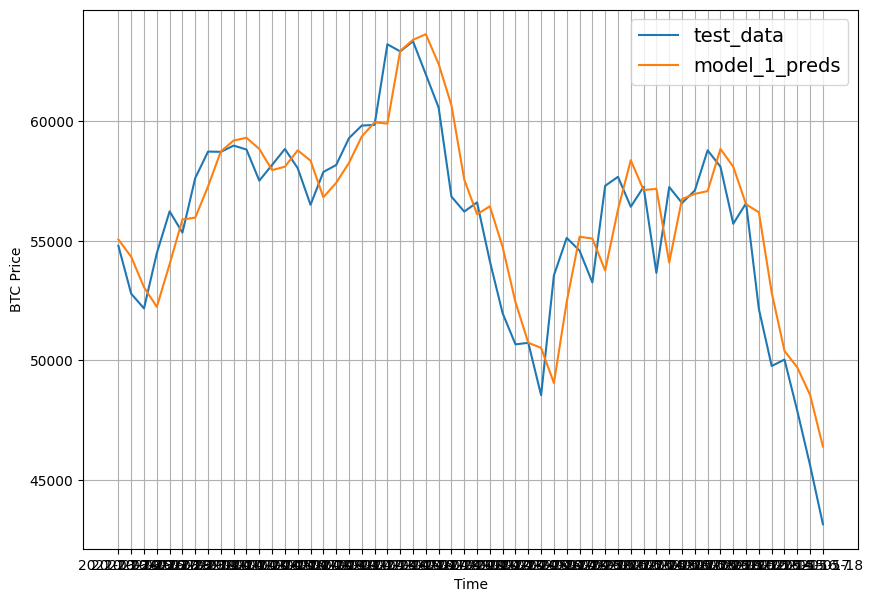

In [39]:
offset = 500

plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], # get test only which is last in our dataset
                 values = test_labels[:, 0],
                 start=offset,
                 format='-',
                 label='test_data')

plot_time_series(timesteps=X_test[-len(test_windows):], # get test only which is last in our dataset
                 values = model_1_preds,
                 start=offset,
                 format='-',
                 label='model_1_preds')

## Create model_2 Building, compling, fitting

### Preproccesing data

In [40]:
# make variables
HORIZON = 1
WINDOW_SIZE = 30

In [41]:
# make windows
full_windows, full_labels = make_windows(x=prices,
                                         windows_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [43]:
# make train, test
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                               full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

### Creat and compile and fitting model

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_2_dense") # give the model a name so we can save it

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_2.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 2s 35ms/step - loss: 902.9008 - mae: 902.9008 - val_loss: 3285.4565 - val_mae: 3285.4565
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 363.5036 - mae: 363.5036 - val_loss: 1662.3374 - val_mae: 1662.3374
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 267.8218 - mae: 267.8218 - val_loss: 1289.6141 - val_mae: 1289.6141
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 240.5750 - mae: 240.5750 - val_loss: 1262.8403 - val_mae: 1262.8403
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 213.9944 - mae: 213.9944 - val_loss: 1093.8497 - val_mae: 1093.8497
Epoch 6/100
18/18 [==============================] - 1s 52ms/step - loss: 200.5133 - mae: 200.5133 - val_loss: 1009.4211 - val_mae: 1009.4211
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 182.1966 - mae: 182.1966 - val_loss: 970.9034 - val_mae: 970.9034
Epoch 8/

In [46]:
# evaluate
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 611.2532 - mae: 611.2532


[611.2532348632812, 611.2532348632812]

### Get best model performance

In [47]:
# get best performing model
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 611.2532 - mae: 611.2532


[611.2532348632812, 611.2532348632812]

In [48]:
# make preds
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8823.199, 8867.546, 8666.743, 8564.391, 8406.868], dtype=float32)>

In [49]:
# get results
model_2_res = evaluate_preds(y_true=tf.squeeze(test_labels),
                             y_pred=model_2_preds)
model_2_res

{'mae': 611.25336,
 'mse': 1273158.4,
 'rmse': 1128.3431,
 'mape': 2.7881129,
 'mase': 1.0684769}

In [50]:
model_1_res

{'mae': 565.04114,
 'mse': 1164058.1,
 'rmse': 1078.9153,
 'mape': 2.554576,
 'mase': 0.99262077}

### Plotting model_2 results

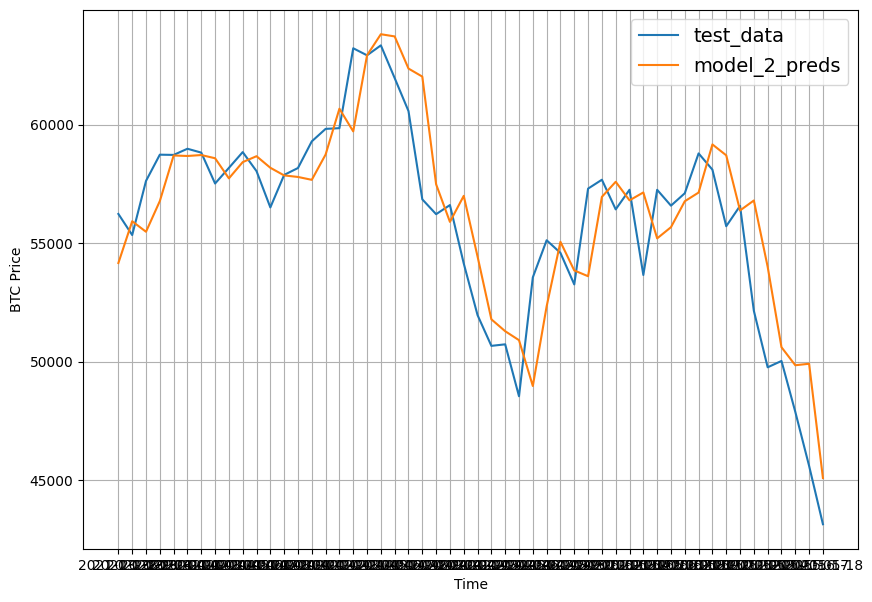

In [51]:
offset = 500

plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], # get test only which is last in our dataset
                 values = test_labels[:, 0],
                 start=offset,
                 format='-',
                 label='test_data')

plot_time_series(timesteps=X_test[-len(test_windows):], # get test only which is last in our dataset
                 values = model_2_preds,
                 start=offset,
                 format='-',
                 label='model_2_preds')

## Create model_3 Building, compling, fitting

### Preproccesing data

In [52]:
# make variables
HORIZON = 7
WINDOW_SIZE = 30

In [53]:
# make windowed data
full_windows, full_labels = make_windows(x=prices, windows_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# make train, test
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                               full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

### Edit Function for evaluate preds `because Now we have more that one horizon`

In [56]:
from tensorflow.keras.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def evaluate_preds(y_true, y_pred):

  # Make sure float 32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # calc varoius methods
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # check if there more that one horizon
  if mae.ndim > 0 :
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

### Creat and compile and fitting model

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_3_dense") # give the model a name so we can save it

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_3.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 1721.8931 - mae: 1721.8931 - val_loss: 4916.7451 - val_mae: 4916.7451
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 599.2908 - mae: 599.2908 - val_loss: 2400.0649 - val_mae: 2400.0649
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 432.0659 - mae: 432.0659 - val_loss: 2242.5269 - val_mae: 2242.5269
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 390.9331 - mae: 390.9331 - val_loss: 2074.2085 - val_mae: 2074.2085
Epoch 5/100
18/18 [==============================] - 1s 54ms/step - loss: 371.1942 - mae: 371.1942 - val_loss: 2069.4421 - val_mae: 2069.4421
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 353.2419 - mae: 353.2419 - val_loss: 1756.0154 - val_mae: 1756.0154
Epoch 7/100
18/18 [==============================] - 0s 27ms/step - loss: 330.5975 - mae: 330.5975 - val_loss: 1665.8663 - val_mae: 1665.8663
Epoc

In [59]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1438.5653 - mae: 1438.5653


[1438.5653076171875, 1438.5653076171875]

### Get best model performance

In [60]:
# get best performing model_3
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1232.7466 - mae: 1232.7466


[1232.74658203125, 1232.74658203125]

In [61]:
# make predictions
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:3]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9340.033, 9252.12 , 9409.791, 9369.359, 9595.37 , 9628.011,
        9587.995],
       [9084.775, 8901.251, 9070.207, 9210.303, 9341.347, 9187.538,
        9362.453],
       [8819.195, 8933.056, 8789.447, 9062.097, 9152.611, 9066.583,
        8987.23 ]], dtype=float32)>

In [62]:
# let's evaluating our model_3
model_3_res = evaluate_preds(y_true=tf.squeeze(test_labels),
                             y_pred=model_3_preds)
model_3_res

{'mae': 1232.7465,
 'mse': 5342489.0,
 'rmse': 1413.3097,
 'mape': 5.528829,
 'mase': 2.1936035}

### Plotting model_3 results

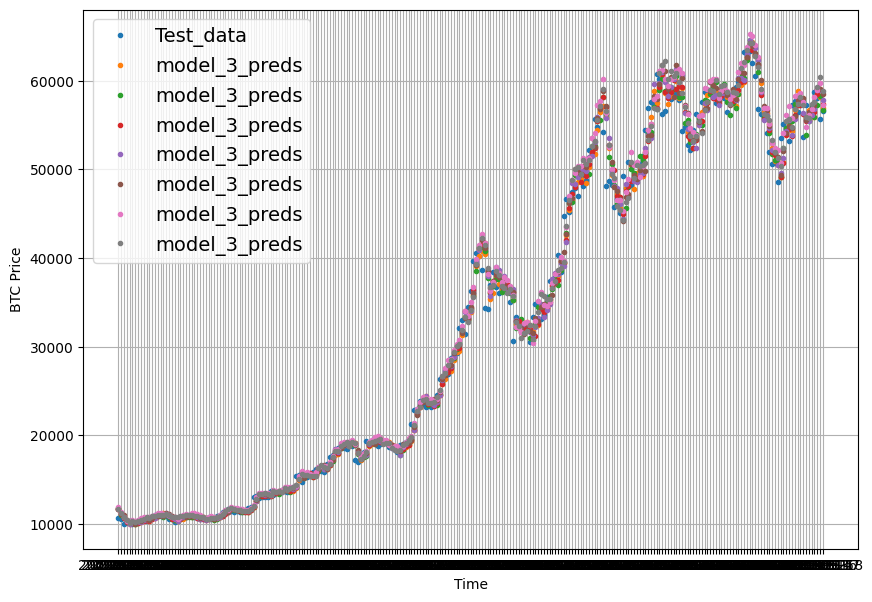

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

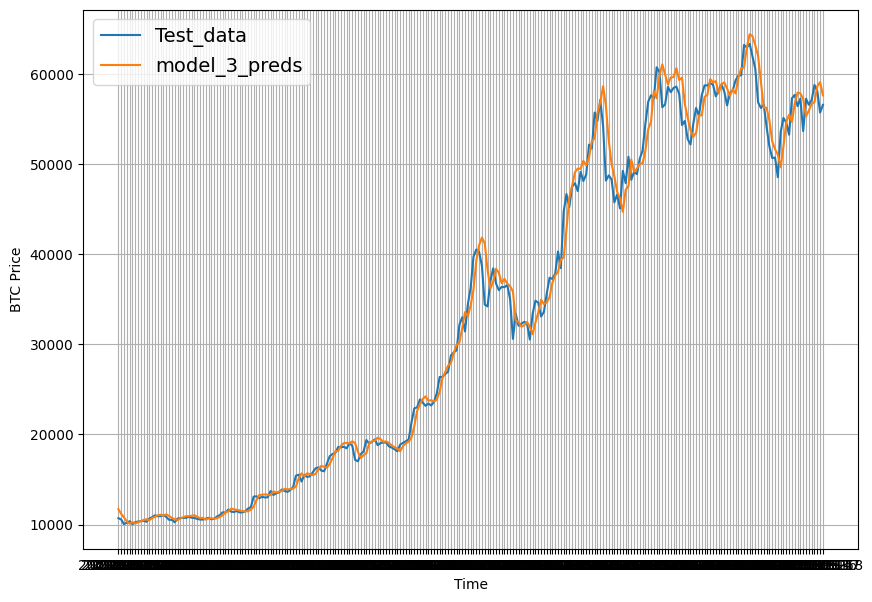

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format='-', label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label="model_3_preds")

## Investing how to turn univariant model to multivariant model

In [100]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [101]:
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [102]:
bitcoin_prices.index[0]

'2013-10-01'

In [103]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

### Creating and plotting multivariate time series BTC prices

In [104]:
from datetime import datetime

# Convert the string to a datetime object
bitcoin_prices_index_0 = np.datetime64(bitcoin_prices.index[0])
bitcoin_prices_index_0

numpy.datetime64('2013-10-01')

In [106]:
# Get date indexes for when to add in different block dates
timedelta_reward_2 = (block_reward_3_datetime - bitcoin_prices_index_0).astype('timedelta64[D]')
block_reward_2_days = timedelta_reward_2.astype(int)

timedelta_reward_3 = (block_reward_4_datetime - bitcoin_prices_index_0).astype('timedelta64[D]')
block_reward_3_days = timedelta_reward_3.astype(int)

block_reward_2_days, block_reward_3_days

(1012, 2414)

In [107]:
# make a copy from df
bitcoin_prices_block = bitcoin_prices.copy()

# make a new col
bitcoin_prices_block['reward_blocks'] = None

In [108]:
# Add in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [109]:
bitcoin_prices_block.head()

,Closing Price (USD),reward_blocks
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [110]:
bitcoin_prices_block.tail()

,Closing Price (USD),reward_blocks
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


### Plotting Our dataframe

In [113]:
from sklearn.preprocessing import minmax_scale
scaled_price_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[['Closing Price (USD)', 'reward_blocks']]),
    columns = bitcoin_prices_block.columns,
    index = bitcoin_prices_block.index
)

scaled_price_df

,Closing Price (USD),reward_blocks
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0
...,...,...
2021-05-14,0.785214,0.0
2021-05-15,0.789461,0.0
2021-05-16,0.755509,0.0


<Axes: xlabel='Date'>

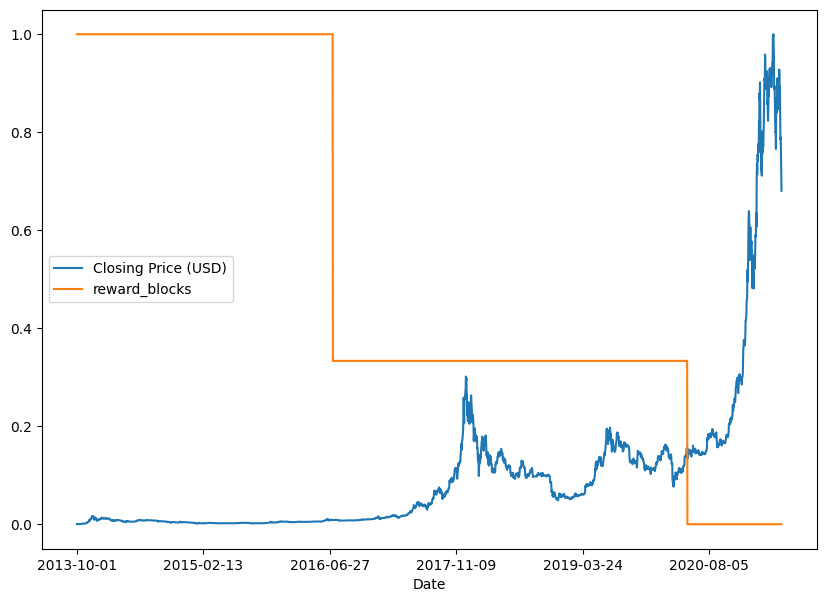

In [114]:
# plotting dataframe
scaled_price_df.plot(figsize=(10, 7))

### Prepare Our multivariate time series for model_6

In [115]:
# Setup dataset HyperParams
HORIZON = 1
WINDOW_SIZE = 7

In [116]:
# make a copy from df
bitcoin_prices_windowed = bitcoin_prices_block.copy()
bitcoin_prices_windowed.head()

,Closing Price (USD),reward_blocks
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


### Add windowed columns

In [118]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'price{i+1}'] = bitcoin_prices_windowed['Closing Price (USD)'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Closing Price (USD),reward_blocks,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


### Create `X(windows)` and `Y(Horizons)` data

In [124]:
X = bitcoin_prices_windowed.dropna().drop('Closing Price (USD)', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Closing Price (USD)"].astype(np.float32)
len(X), len(y)

(2780, 2780)

### Make Test & train split


In [125]:
split_size = int(len(X) * 0.8)

X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Create model_6 Building, compiling, fitting

In [135]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_6_dense_multivariate") # give the model a name so we can save it

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_6.fit(X_train, y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 3s 35ms/step - loss: 856.8831 - mae: 856.8831 - val_loss: 2346.0933 - val_mae: 2346.0933
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 226.8206 - mae: 226.8206 - val_loss: 1074.9059 - val_mae: 1074.9059
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 162.5050 - mae: 162.5050 - val_loss: 808.6680 - val_mae: 808.6680
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 141.2234 - mae: 141.2234 - val_loss: 807.9313 - val_mae: 807.9313
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 137.0804 - mae: 137.0804 - val_loss: 755.9279 - val_mae: 755.9279
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 137.9517 - mae: 137.9517 - val_loss: 846.4488 - val_mae: 846.4488
Epoch 7/100
18/18 [==============================] - 1s 37ms/step - loss: 137.4507 - mae: 137.4507 - val_loss: 744.6358 - val_mae: 744.6358
Epoch 8/100
18/18

In [136]:
# evaluate
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 582.8273 - mae: 582.8273


[582.8273315429688, 582.8273315429688]

### Get Best Performing model

In [141]:
model_6 = tf.keras.models.load_model('/content/model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 567.5347 - mae: 567.5347


[567.5347290039062, 567.5347290039062]

In [142]:
# Make preds
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8856.925, 8783.766, 9065.774, 8788.244, 8729.121], dtype=float32)>

In [143]:
# Get results
model_6_res = evaluate_preds(y_true=y_test,
                             y_pred=model_6_preds)
model_6_res

{'mae': 567.5347,
 'mse': 1164489.2,
 'rmse': 1079.115,
 'mape': 2.5294707,
 'mase': 0.99700135}

In [144]:
model_1_res

{'mae': 565.04114,
 'mse': 1164058.1,
 'rmse': 1078.9153,
 'mape': 2.554576,
 'mase': 0.99262077}